we will be using the https://archive.ics.uci.edu/dataset/45/heart+disease dataset for predicting whether a patient has heart disease or not. we will perform datapreprocessing, analysign the dataset and implemnting ANN.
This directory contains 4 databases concerning heart disease diagnosis.
   All attributes are numeric-valued.  The data was collected from the
   four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

It has total about 76 raw attributes but 14 of them are most used attributes in MLmodels so we will use those attributes.All processed files have data with 14 attributes.

    1.age: Age in years
    2.sex: Sex (1 = male, 0 = female)
    3.cp: Chest pain type (0-3)
            -- Value 1: typical angina
            -- Value 2: atypical angina
            -- Value 3: non-anginal pain
            -- Value 4: asymptomatic
    4.trestbps: Resting blood pressure (in mm Hg on admission to the
        hospital)
    5.chol: Serum cholesterol (mg/dl)
    6.fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)
    7.restecg: Resting electrocardiographic results (0-2)
            -- Value 0: normal
            -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
            -- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

    8.thalach: Maximum heart rate achieved
    9.exang: Exercise-induced angina (1 = yes, 0 = no)
    10.oldpeak: ST depression induced by exercise relative to rest
    11.slope: Slope of the peak exercise ST segment (0-2)
              -- Value 1: upsloping
              -- Value 2: flat
              -- Value 3: downsloping
    12.ca: Number of major vessels colored by fluoroscopy (0-3)
    13.thal: Thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
    14.target: Diagnosis of heart disease (0 = no disease, 1-4 = different severity levels)

The data set has many missing values so this script will also handle the missing values.


In [ ]:
#importing the libraries that are needed for the datapreprocessing step
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf


In [ ]:
#column names are not populated when reading CSV so loading a columns_name varaible with column names to use it in reading csv
columns_name= ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "target"]

Here am implemting model with only one datafile(processed.cleveland.data), the code is written to include more datafile and combine them as one single file. since there are many missing values when all the files are combined i chose to proceede with cleveland data file.

          To implement the mdoel with all files combined include the other file names in file_paths seperated by comma
   

In [ ]:
#file_paths = ["processed.cleveland.data","processed.hungarian.data","processed.switzerland.data","processed.va.data"]
file_paths = ["processed.cleveland.data"]
df_list = []
for file_path in file_paths:
    df = pd.read_csv(file_path,names=columns_name,na_values='?')
    df_list.append(df)
df = pd.concat(df_list, ignore_index=True)

In [ ]:
#using the display to view data as a table instead of print
display(df)

 looking at the output from the dataset, the target column has values from 0-4 which are classified as 0 for no heart disease and 1,2,3,4 as different heart,disesases, since we are considering this as target varibale converting it to 0 and 1, 0-No hearrt disease and 1-Presence of heart disease and reasssigning it to the value to target column

In [ ]:
df['target']=df['target'].apply(lambda x: 1 if x > 0 else 0)

In [ ]:
#usign display to see output in a tabular format
display(df)

In [ ]:
#checking if there are any null values in the dataframe
df.isnull().values.any()

In [ ]:
#printing to checkin how many null values are there column wise
print(df.isnull().sum())

In [ ]:
#handling missing values by replacing them with mean and displaying the records
df=df.fillna(df.mean())
display(df)


In [ ]:
#checking dataframe information, this prints memory usage, column names and its types
df.info()

In [ ]:
#defining the feature and target variables
X=df.drop('target',axis=1)
y=df['target']


plot graphs between sex and target

In [ ]:
import seaborn as sns
plt.figure(figsize=(6,4))
sns.countplot(x='sex', hue='target', data=df)
plt.title('Sex vs Heart Disease')
plt.xlabel('Sex')
plt.ylabel('Count')

In [ ]:
sex_value_counts=df.groupby('sex').size()
print(sex_value_counts)
import seaborn as sns
plt.pie(sex_value_counts, labels=sex_value_counts.index,colors=sns.color_palette('bright'))
plt.title("Sex Distribution in Dataset")
plt.show()

In [ ]:
age_bins = [29, 40, 50, 60, 70, 80]
age_labels = ['30-39', '40-49', '50-59', '60-69', '70-79']
df['age_group']= pd.cut(df['age'],bins=age_bins, labels=age_labels, right=False)
age_distribution=df['age_group'].value_counts()
plt.pie(age_distribution, labels=age_distribution.index,colors=sns.color_palette('bright'))
plt.title("Age Group Distribution in Dataset")
plt.show()

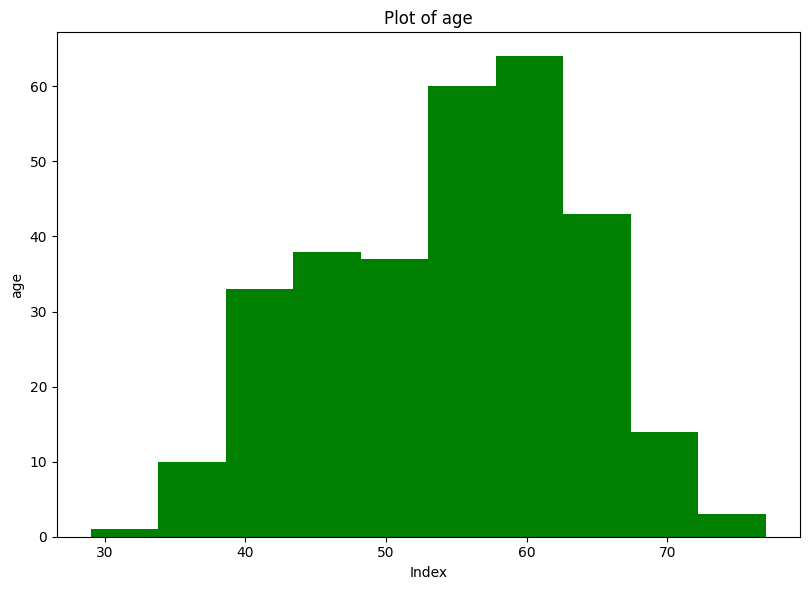

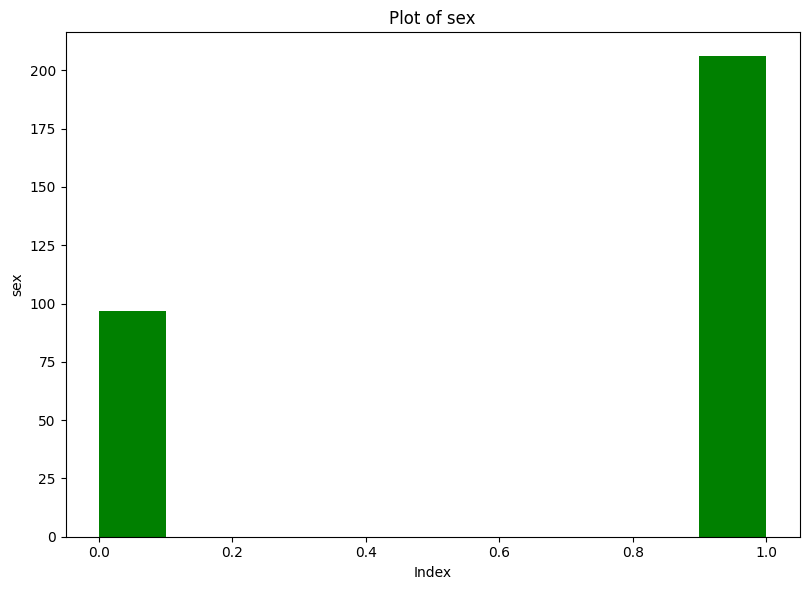

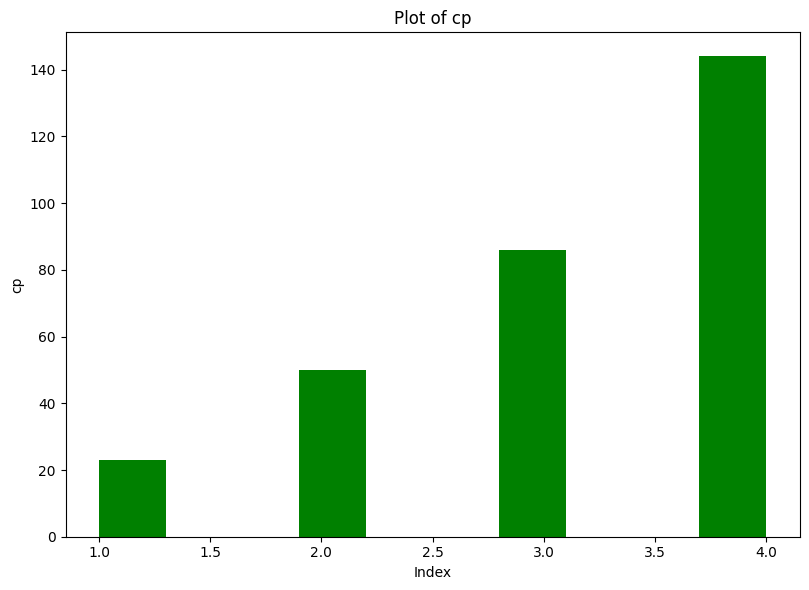

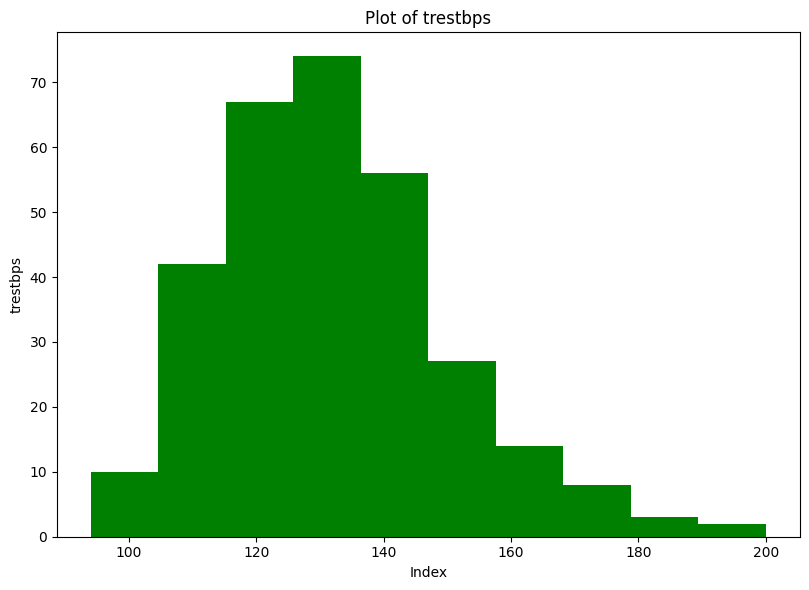

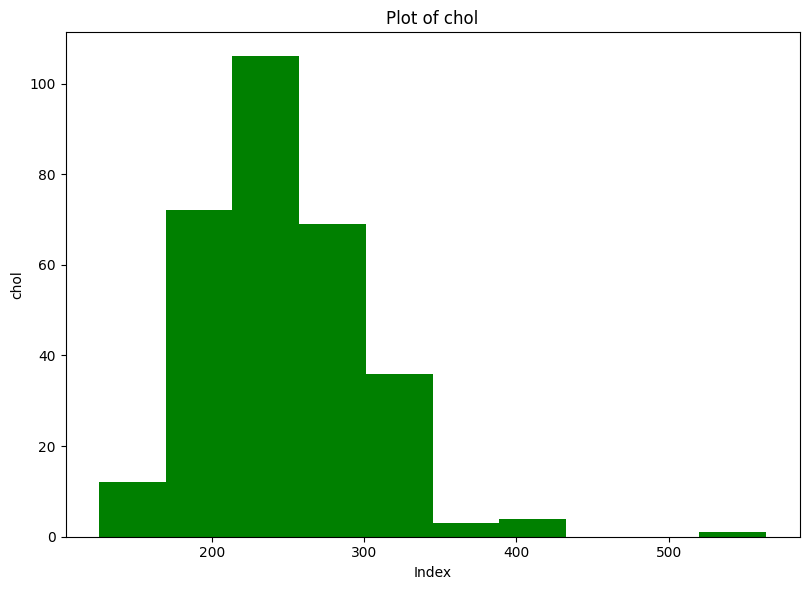

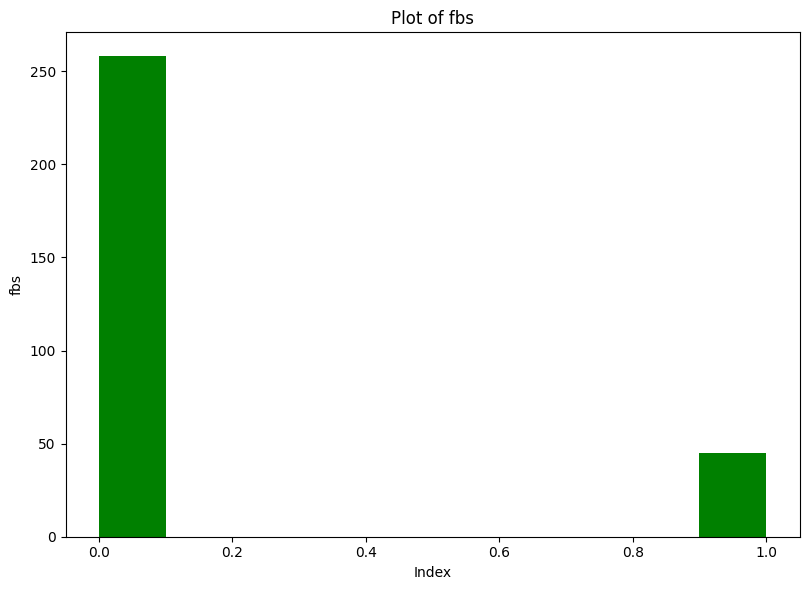

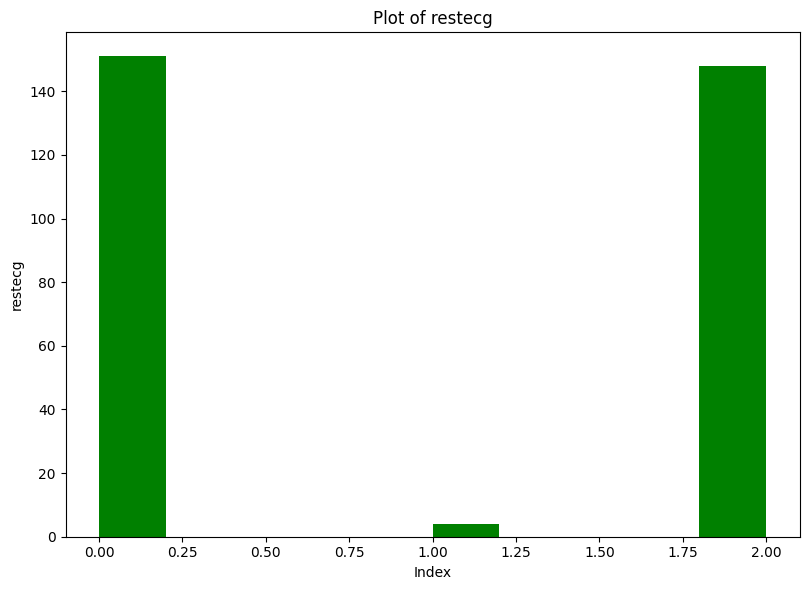

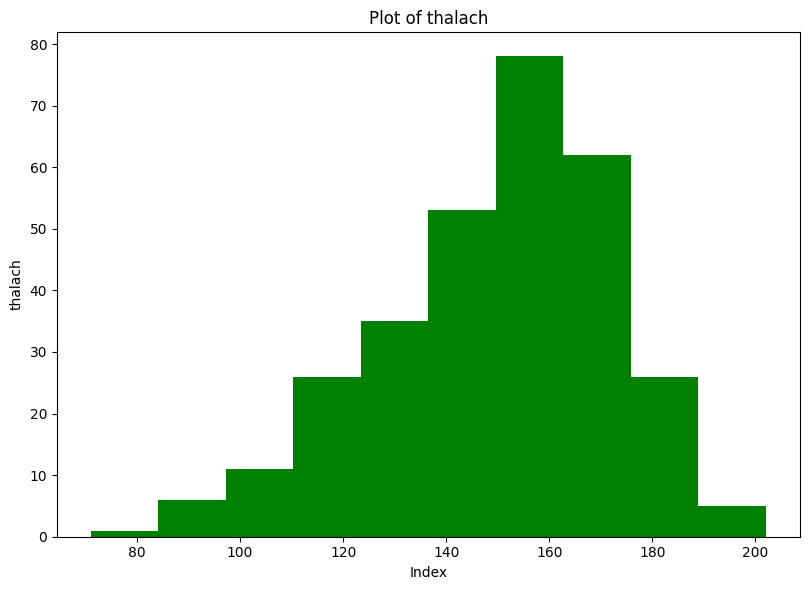

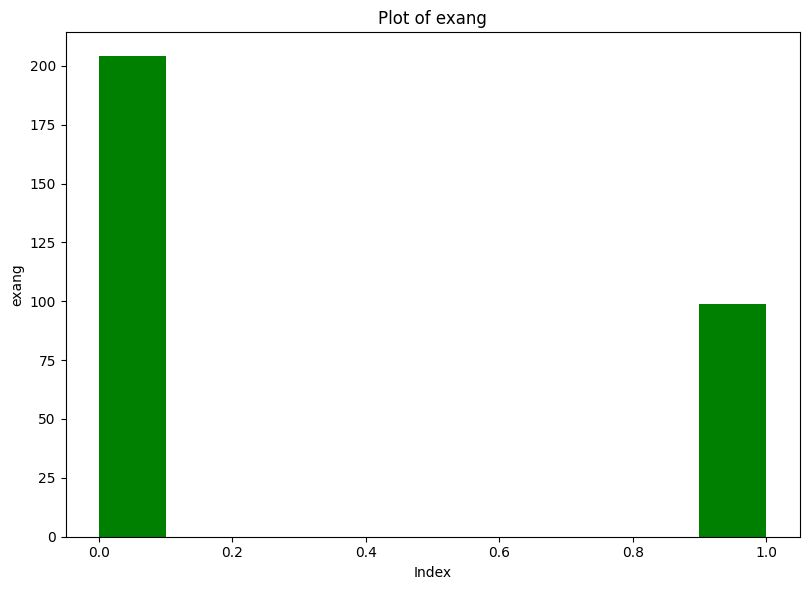

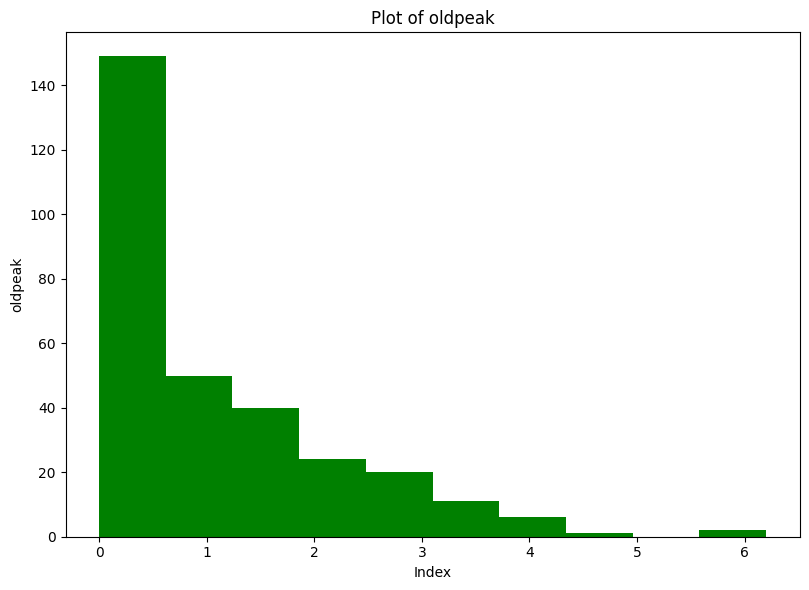

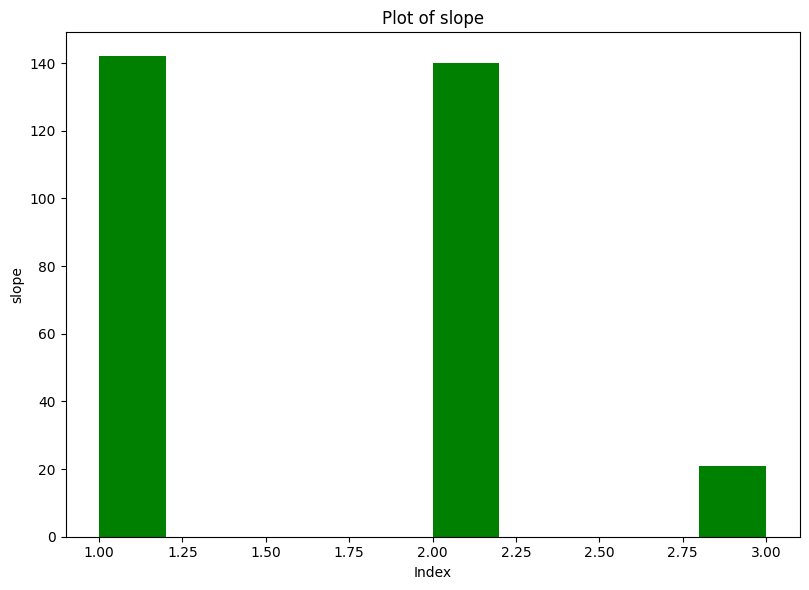

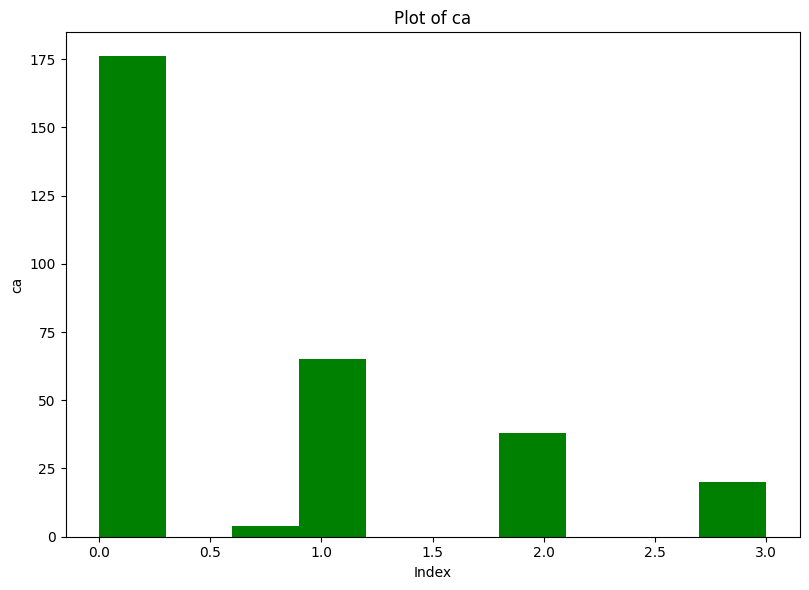

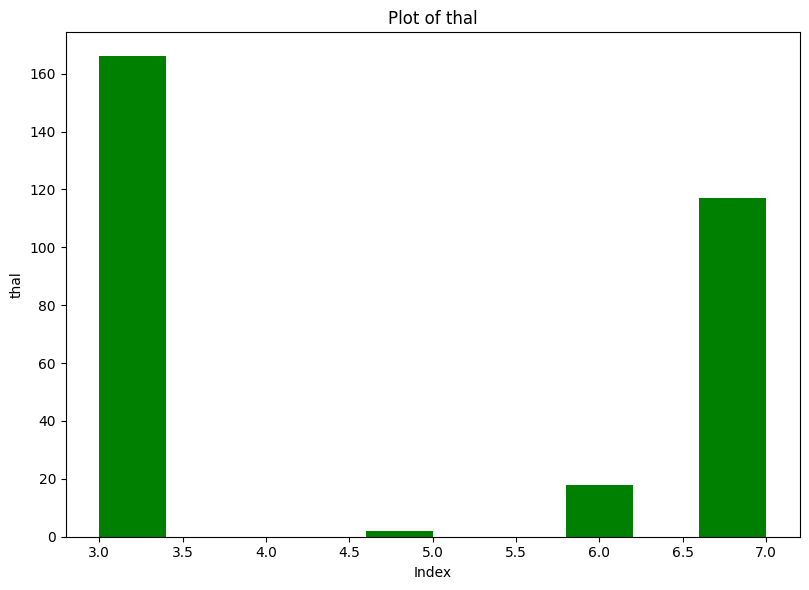

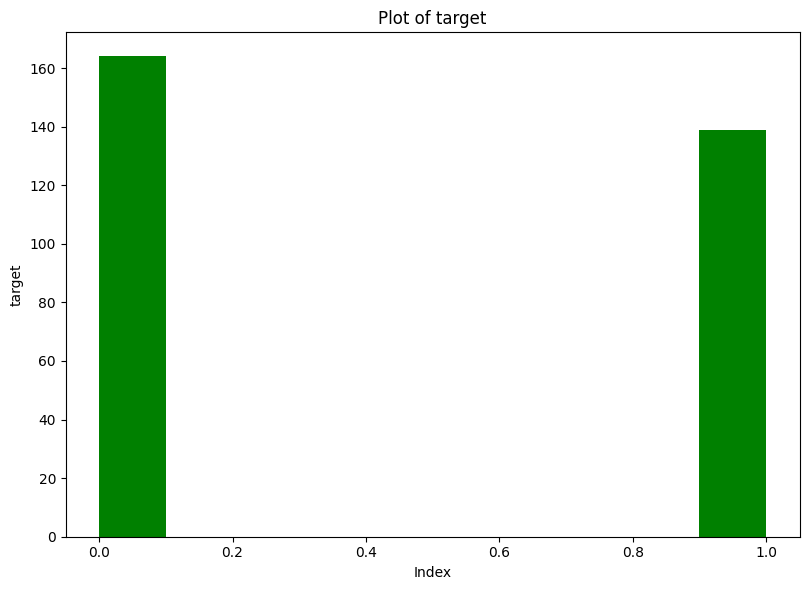

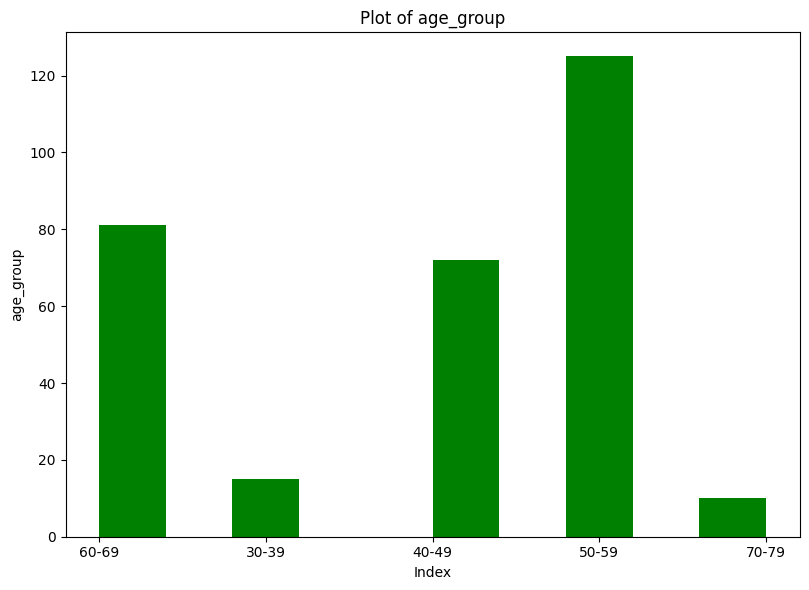

In [ ]:
#plotting graphs for columns in X to its values
import matplotlib.pyplot as plt
for columns in df.columns:
  fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
  plt.hist(df[columns],bins=10,color='green')
  plt.title(f'Plot of {columns}')
  plt.xlabel('Index')
  plt.tight_layout()
  plt.ylabel(columns)
  plt.show()


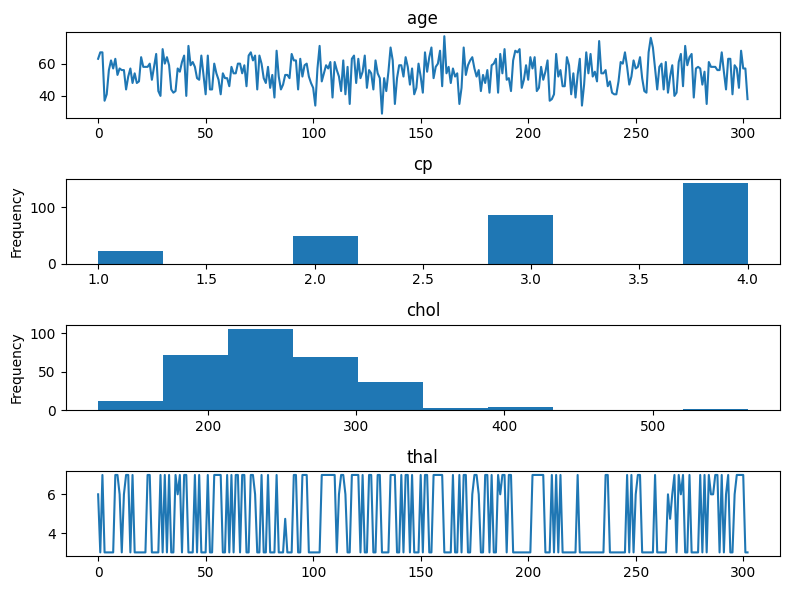

In [ ]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(nrows=4, ncols=1, figsize=(8, 6))
df['age'].plot(ax=axes[0], title='age',kind='line')
df['cp'].plot(ax=axes[1], title='cp',kind='hist')
df['chol'].plot(ax=axes[2], title='chol',kind='hist')
df['thal'].plot(ax=axes[3], title='thal')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()


Implementing feature importance analysis using RandomForestRegressor and printing them as a graph.

    Reading output from graphs
      1. Higher values mean a feature is more important
      2. Lower values suggest feature contributes less to predictions


In [ ]:
display(df)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,age_group
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.000000,6.0,0,60-69
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.000000,3.0,1,60-69
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.000000,7.0,1,60-69
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.000000,3.0,0,30-39
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.000000,3.0,0,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.000000,7.0,1,40-49
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.000000,7.0,1,60-69
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.000000,7.0,1,50-59
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.000000,3.0,1,50-59


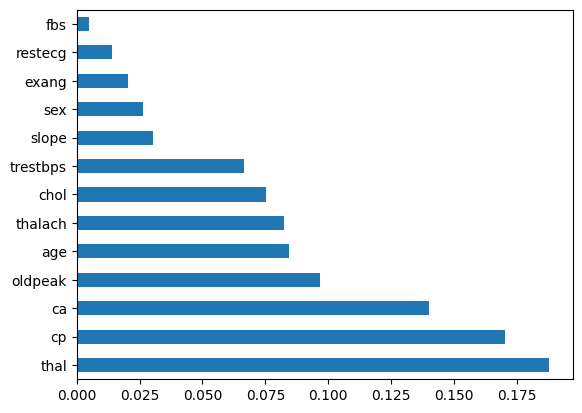

In [ ]:
from sklearn.ensemble import RandomForestRegressor
import statsmodels.api as sm
columns_to_drop=['target','age_group']
X=df.drop(columns_to_drop,axis=1)
y=df['target']
model=RandomForestRegressor()
model.fit(X,y)
importances=pd.Series(model.feature_importances_, index=X.columns)
importances.nlargest(15).plot(kind='barh')
plt.show()

In [ ]:
#Extracting column names from output using filter on importance and printing them in column format
condition=importances>=np.mean(importances)
featues_from_randomforest = importances[condition].index
print(np.mean(importances))
print(featues_from_randomforest )

0.07692307692307693
Index(['age', 'cp', 'thalach', 'oldpeak', 'ca', 'thal'], dtype='object')


Implementing featue importane using OLS model to calculate P values.

    If p values<=0.05 then the columns are have strong influence on target and if the p values>=0.05 then the columns can be ignored to reduce model complexity


In [ ]:
import statsmodels.api as sm
X=sm.add_constant(X)
model=sm.OLS(y,X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 target   R-squared:                       0.534
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     25.45
Date:                Tue, 18 Feb 2025   Prob (F-statistic):           1.28e-40
Time:                        22:21:46   Log-Likelihood:                -103.29
No. Observations:                 303   AIC:                             234.6
Df Residuals:                     289   BIC:                             286.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.4340      0.317     -1.369      0.1

In [ ]:
#extracting the values from the old model output and assigning them to features_from_OLSRegression
p_values=model.pvalues
features_from_OLSRegression=p_values[p_values<=0.05].index
print(features_from_OLSRegression)

Index(['sex', 'cp', 'thalach', 'exang', 'ca', 'thal'], dtype='object')


In [ ]:
#Defining features based on the output from Randomforestregressor which is assigned to featues_from_randomforest varaible
#After examining the features from random forest regressor and OLSmodel, since age plays a important role in heartdisease considering the randomforest regressor model features.

X=df[featues_from_randomforest]  #to use features from ols model use df[features_from_OLSRegression]
y=df['target']


In [ ]:
#splitting the data into test and train datasets
#skippin encoding the features as we dont have any categorical values in the dataset and i didn't label encode y as i have modified the target to binary in datapreprocessing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
#feature scaling the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Part-2 Building the ANN

In [ ]:
#intializing the ANN
ann=tf.keras.models.Sequential()

In [ ]:
#adding the input layer and first hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#adding the second hidden layer
ann.add(tf.keras.layers.Dense(units=6,activation='relu'))

In [ ]:
#adding the ouput layer
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

Part-3 Trainign the ANN

In [ ]:
#compiling the ANN
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
#'model__activation': 'tanh', 'model__neurons': 6, 'model__optimizer': 'adam'

In [ ]:
#training the model
ann.fit(X_train,y_train,batch_size=16,epochs=100)

Epoch 1/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.4772 - loss: 0.6971
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5043 - loss: 0.6926  
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5534 - loss: 0.6925 
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5151 - loss: 0.6922 
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5458 - loss: 0.6900 
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5318 - loss: 0.6902 
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4953 - loss: 0.6911 
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5206 - loss: 0.6869 
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4996 - loss: 0.6856 
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6570 - loss: 0.6836
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7388 - loss: 0.6722 
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

In [ ]:
#predicting the result of single observation
#['age', 'cp', 'chol', 'thalach', 'oldpeak', 'ca', 'thal']

prediction=(ann.predict(sc.transform([[23,2,150,180,4,6]]))>0.5)
print(f"Predicted probability of heart disease:{prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Predicted probability of heart disease:[[ True]]


In [ ]:
y_pred=ann.predict(X_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.values.reshape(len(y_test),1)),1))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [0 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 1]
 [0 0]
 [0 1]
 [0 0]
 [0 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 1]
 [0 0]]


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[33  2]
 [11 15]]


0.7868852459016393

In [ ]:
# Save model
ann.save("heart_disease_model.h5")
print("Model training complete and saved as heart_disease_model.h5")

Model training complete and saved as heart_disease_model.h5


In [ ]:
# Load the model for deployment
from tensorflow import keras
import flask
from flask import Flask, request, jsonify
model= keras.models.load_model("heart_disease_model.h5")

In [ ]:
# Create Flask app
app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    data = request.get_json()
    input_data = np.array(data['features']).reshape(1, -1)
    input_data = scaler.transform(input_data)
    prediction = model.predict(input_data)
    result = {'prediction': int(prediction[0][0] > 0.5)}
    return jsonify(result)

if __name__ == '__main__':
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with stat
